In [1]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)
from sklearn.linear_model import LinearRegression

# OSA - 1st measurement; highest sensitivity

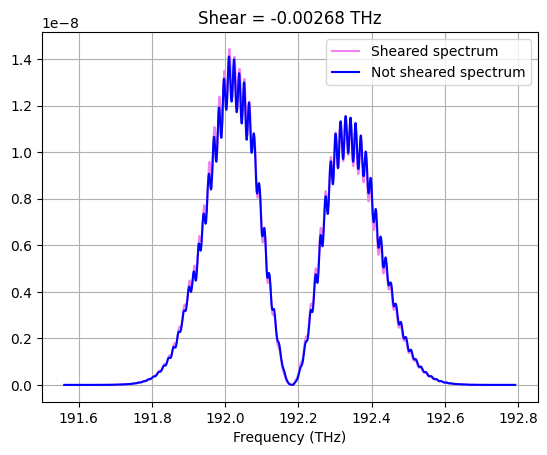

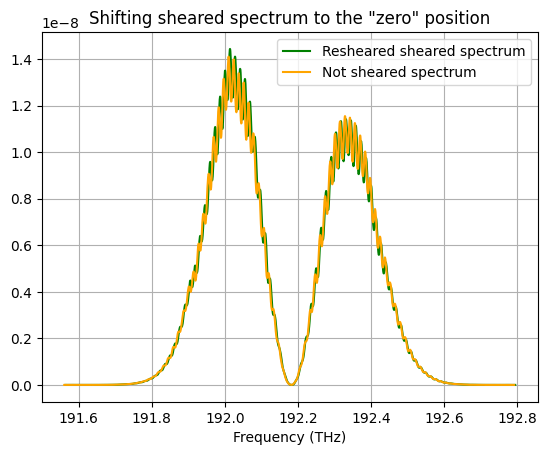

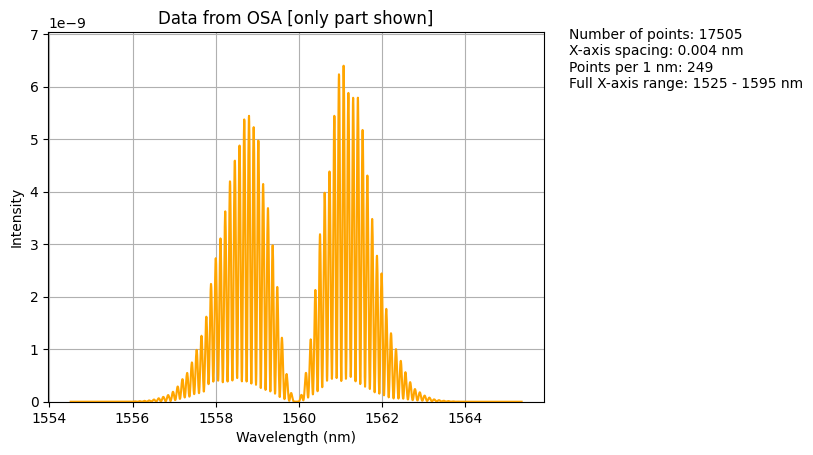

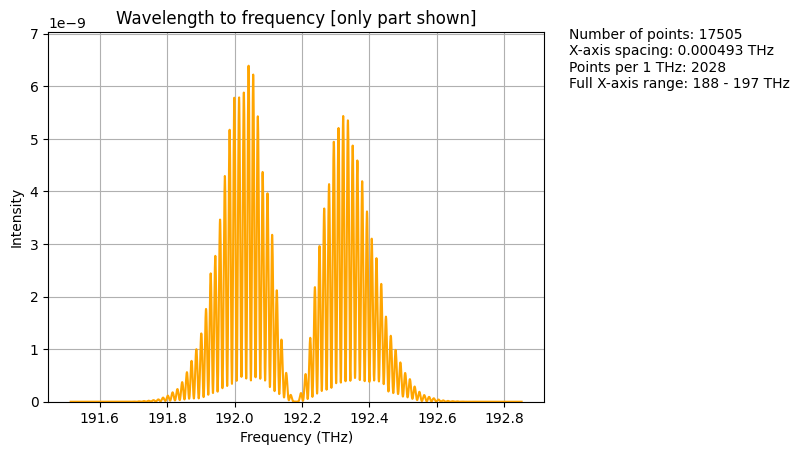

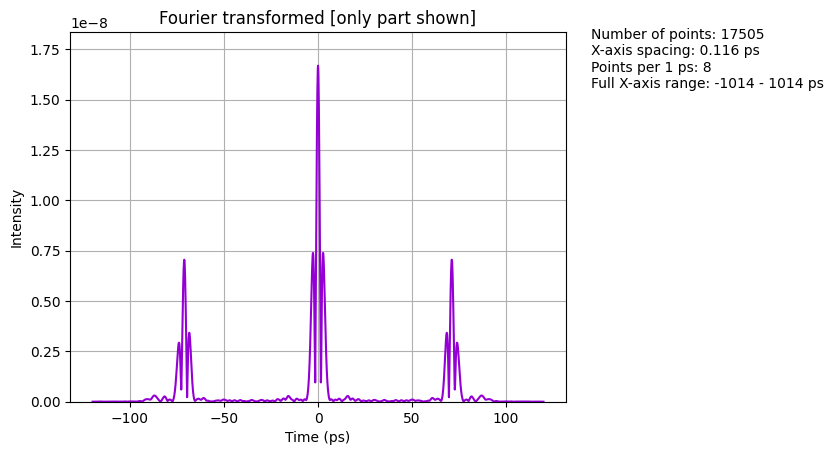

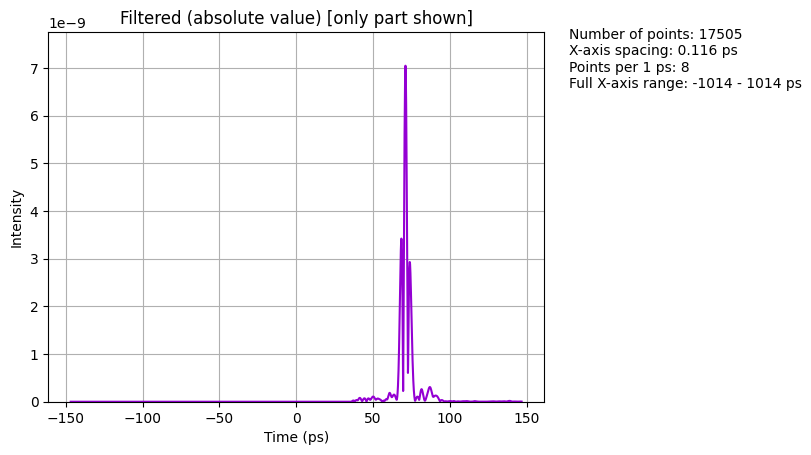

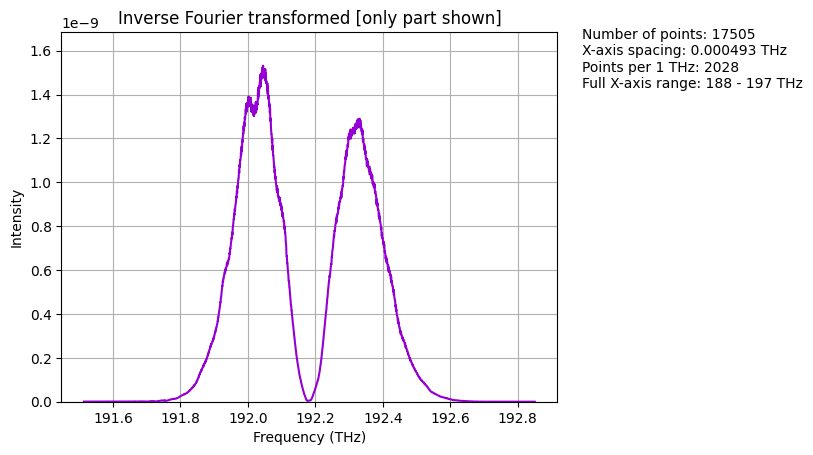

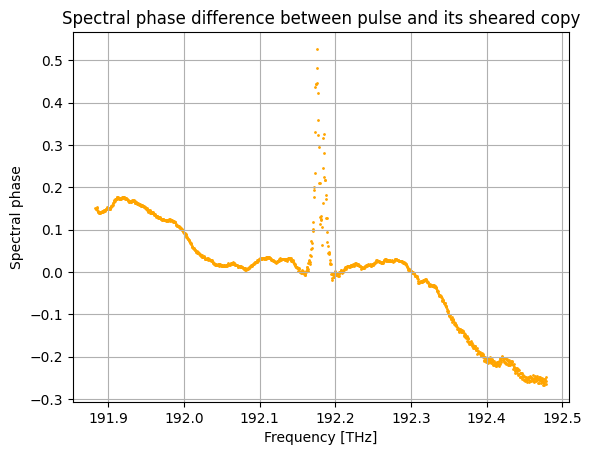

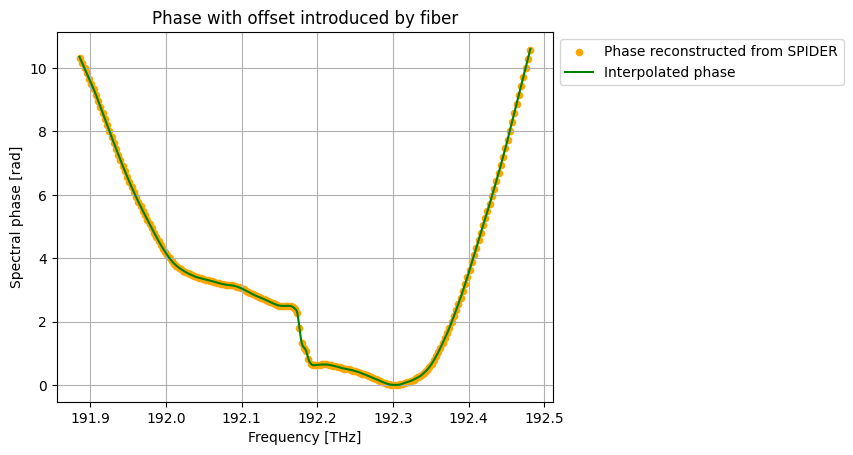

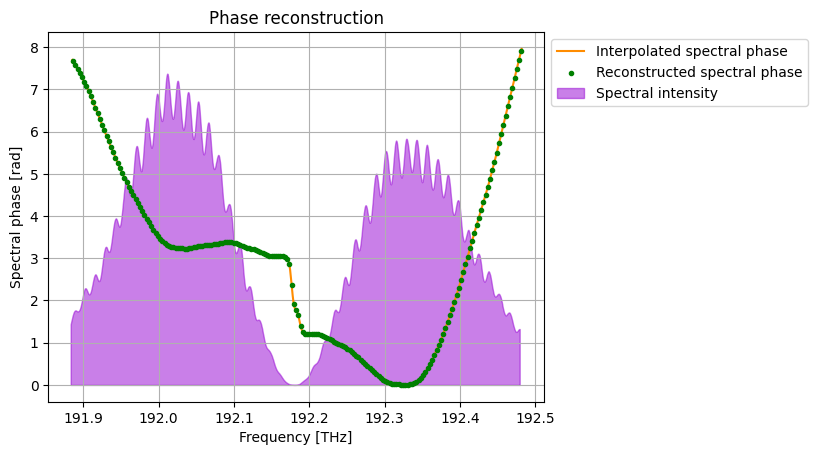

In [30]:
shear = sa.find_shear("data/not_sheared_osa.csv", "data/sheared_osa.csv", how = "slope", show_plot = True)

spd = sa.spider(temporal_spectrum = "data/t_spectrum_osa.csv",
        phase_spectrum = "data/p_spectrum_osa.csv",
        intensity_spectrum = "data/not_sheared_osa.csv",
        shear = shear,
        plot_phase_inter = True,
        plot_steps = True,
        plot_phase = True,
        plot_pulse = False,
        fiber_length = 84,
        phase_borders = None,
        improve_resolution = 1,
        temp_phase_param = 0,
        what_to_return = "phase_diff",
        cut_here = None)

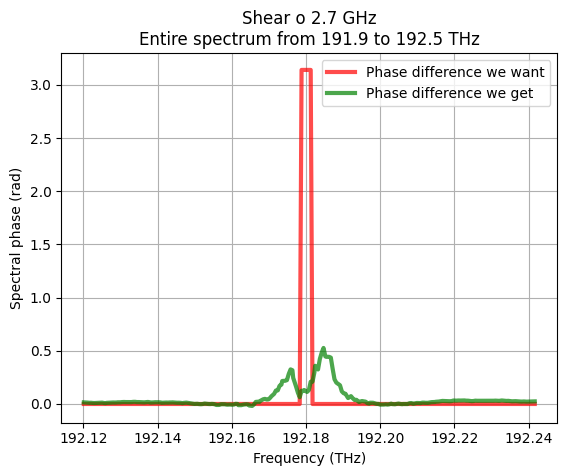

In [61]:
new_spd = spd.copy()
new_spd.cut(192.12, 192.24)

X = new_spd.X.copy()
Y_0 = new_spd.Y.copy()
marker = True
while marker == True:
    marker = False
    for i in range(len(new_spd)-1):
        if X[i+1] > X[i]:
            marker = True
            _ = X[i]
            __ = Y_0[i]
            X[i] = X[i+1]
            Y_0[i] = Y_0[i+1]
            X[i+1] = _
            Y_0[i+1] = __
Y = []
for x in X:
    if np.abs(x-192.18) < 0.0027/2:
        Y.append(np.pi)
    else:
        Y.append(0)
Y = np.array(Y)
plt.plot(X, Y, color = "red", lw = 3, alpha = 0.7)
plt.plot(X, new_spd.Y, color = "green", lw = 3, alpha = 0.7)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral phase (rad)")
plt.legend(["Phase difference we want", "Phase difference we get"])
plt.title("Shear o 2.7 GHz\nEntire spectrum from 191.9 to 192.5 THz")
plt.grid()
plt.show()

# OSA - 2st measurement; high sensitivity

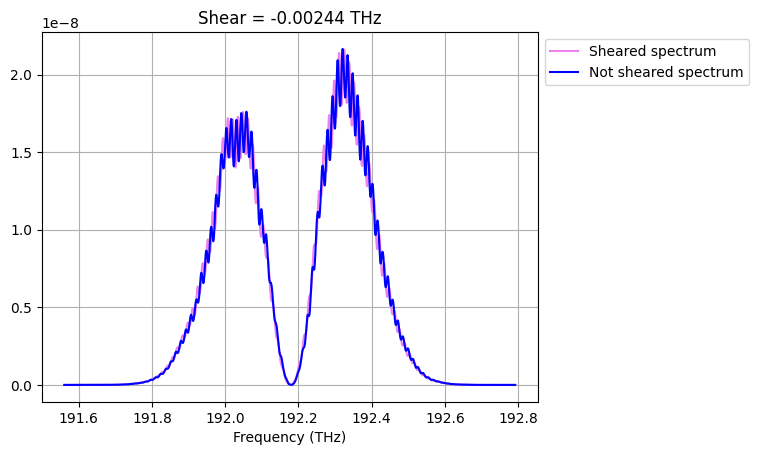

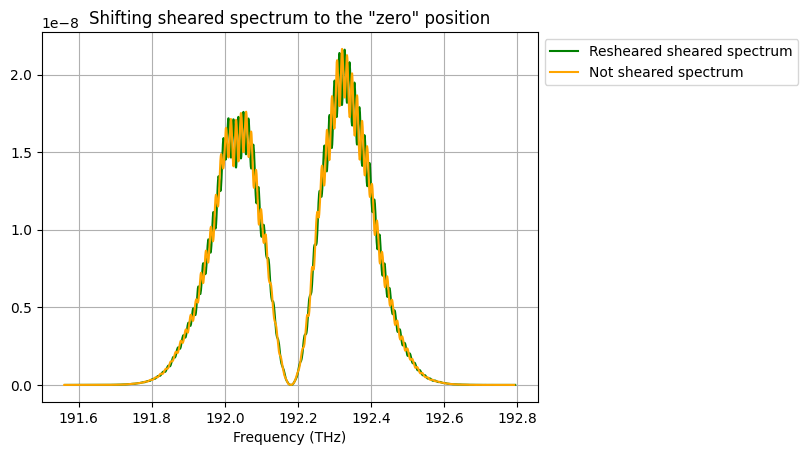

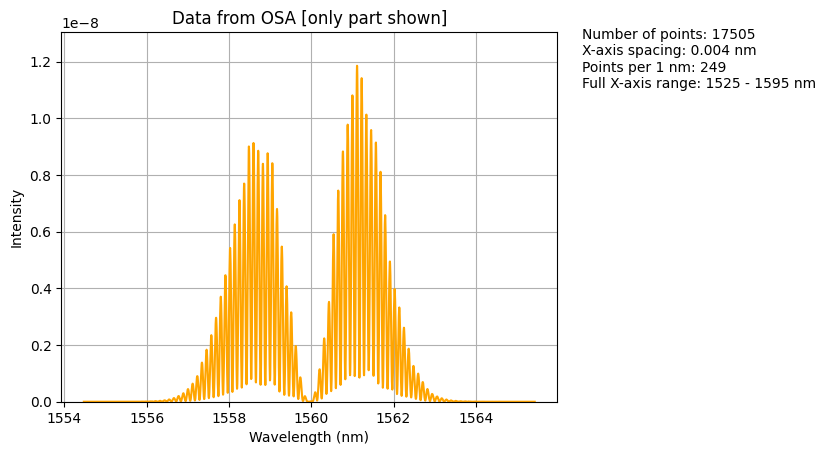

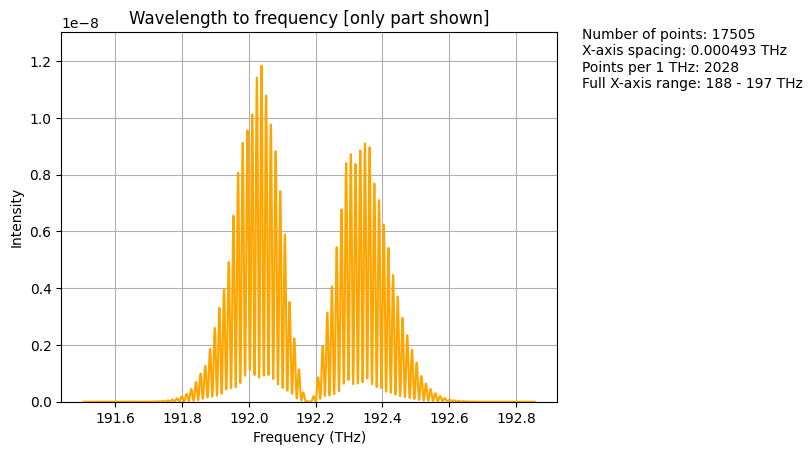

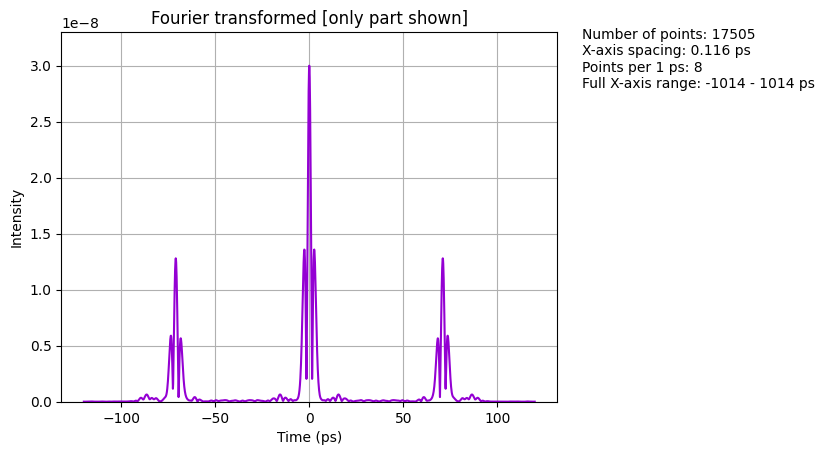

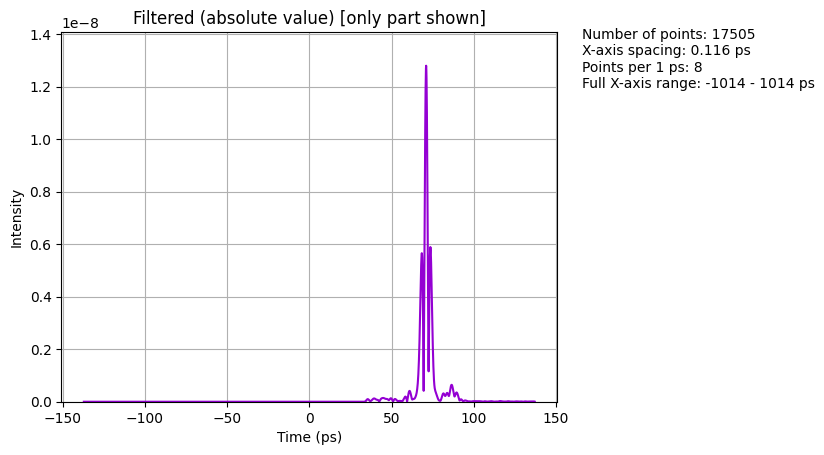

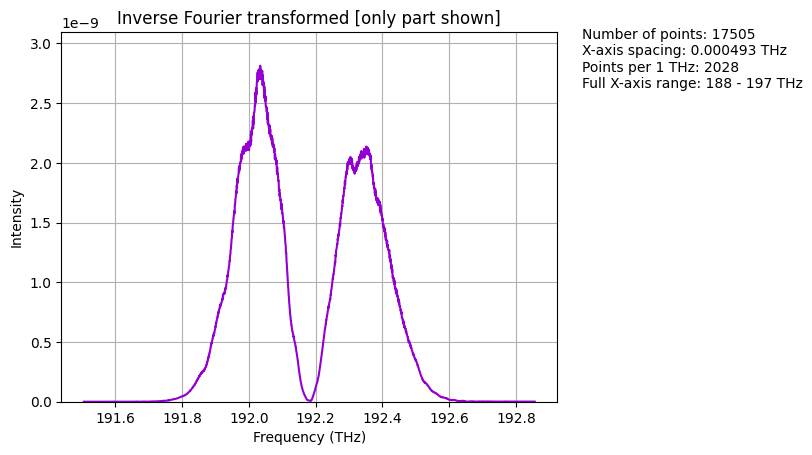

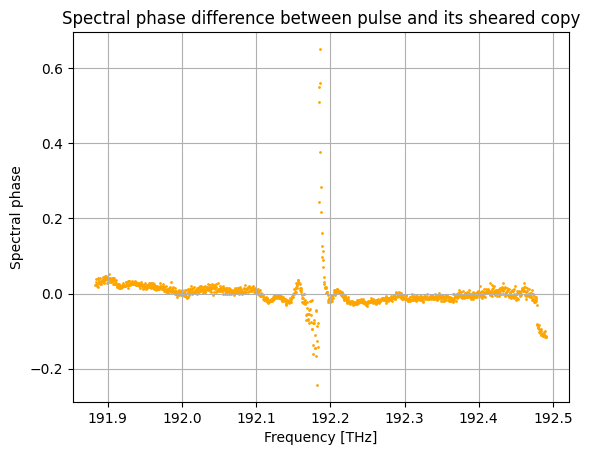

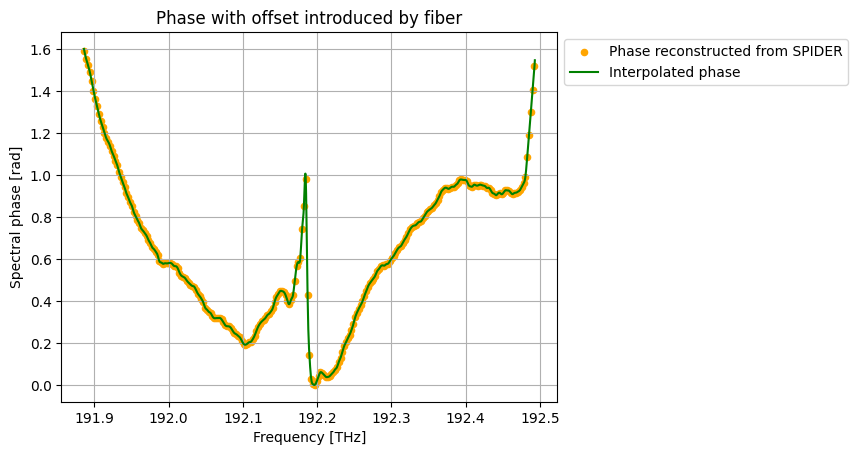

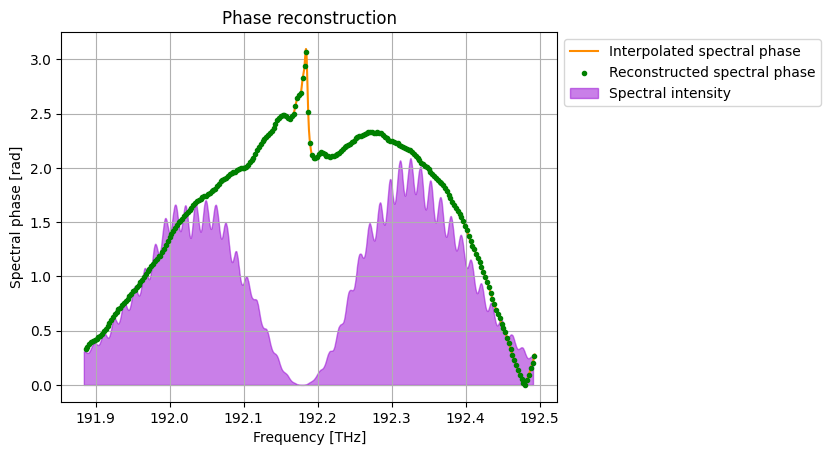

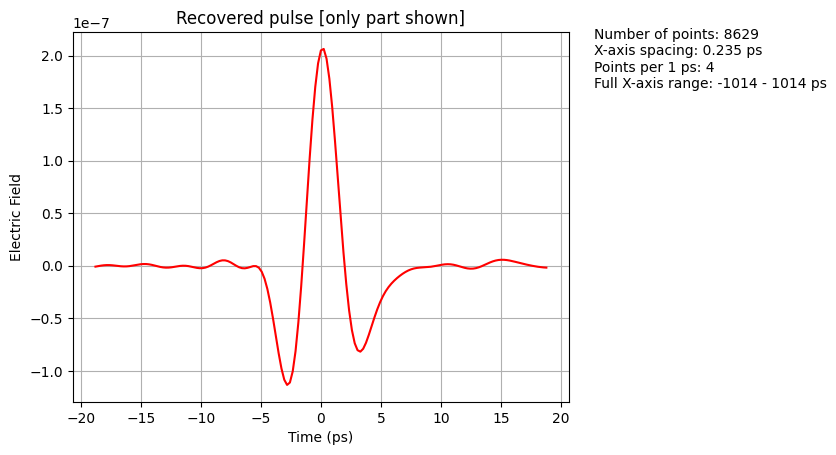

In [3]:
shear = sa.find_shear("data/not_sheared_osa_2.csv", "data/sheared_osa_2.csv", how = "slope", show_plot = True, smoothing_period = None)

sa.spider(temporal_spectrum = "data/t_spectrum_osa_2.csv",
        phase_spectrum = "data/p_spectrum_osa_2.csv",
        intensity_spectrum = "data/not_sheared_osa_2.csv",
        shear = shear,
        plot_phase_inter = True,
        plot_steps = True,
        plot_phase = True,
        plot_pulse = True,
        fiber_length = 84,
        phase_borders = None,
        improve_resolution = 1,
        temp_phase_param = 0,
        cut_here = None)

# APEX

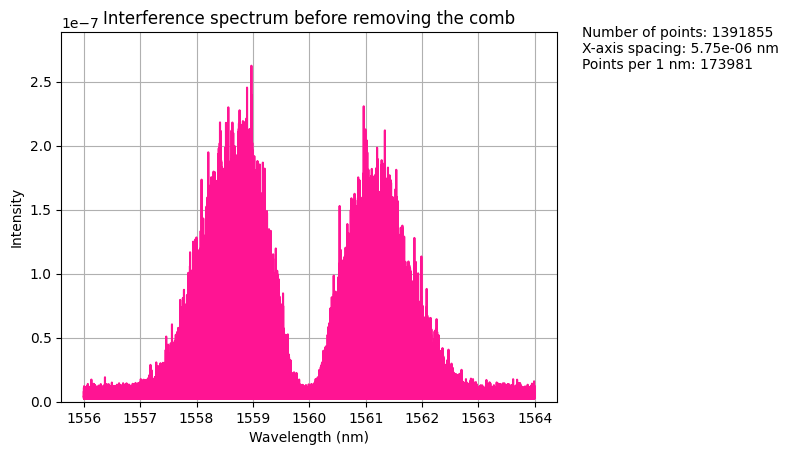

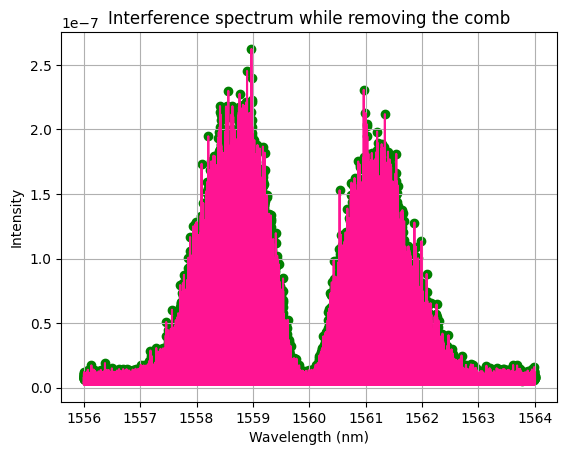

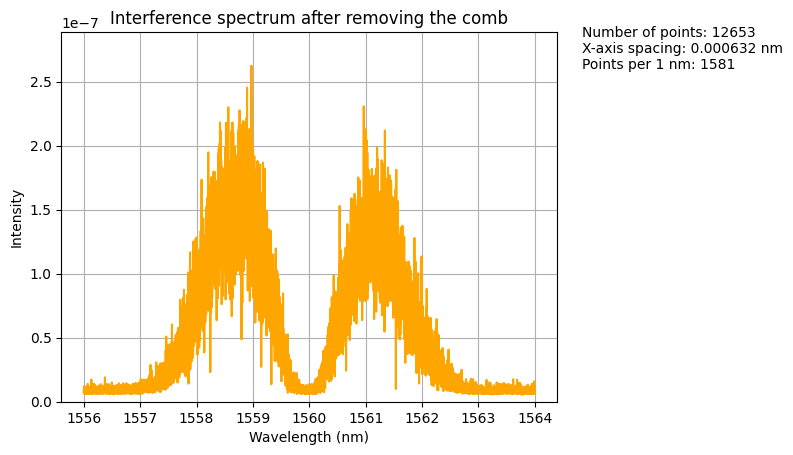

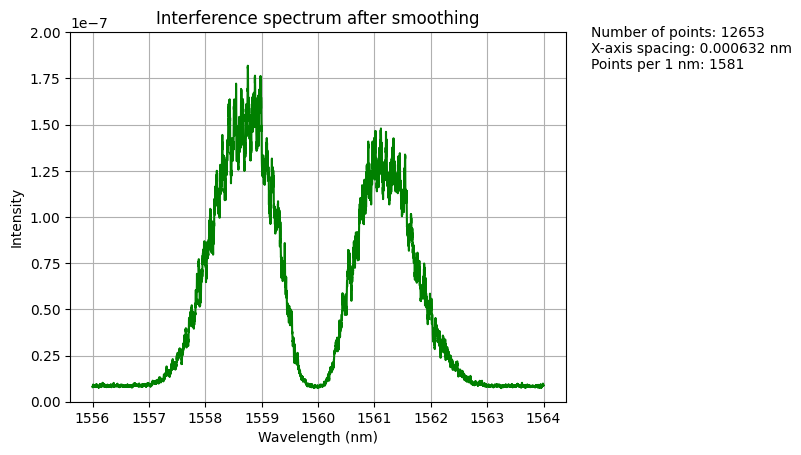

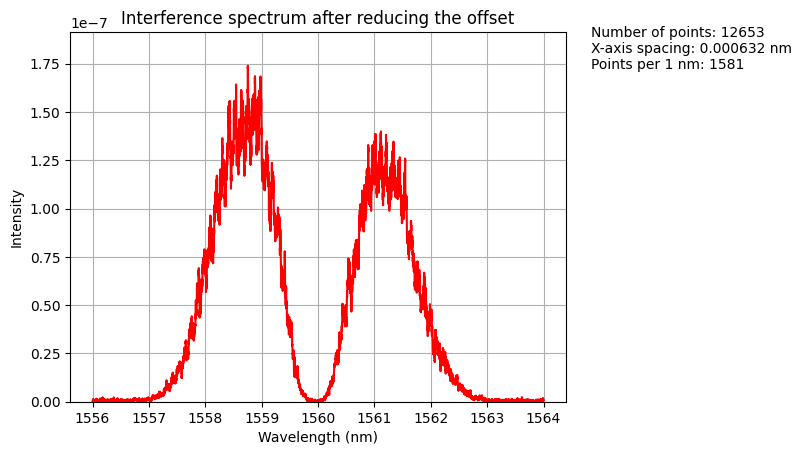

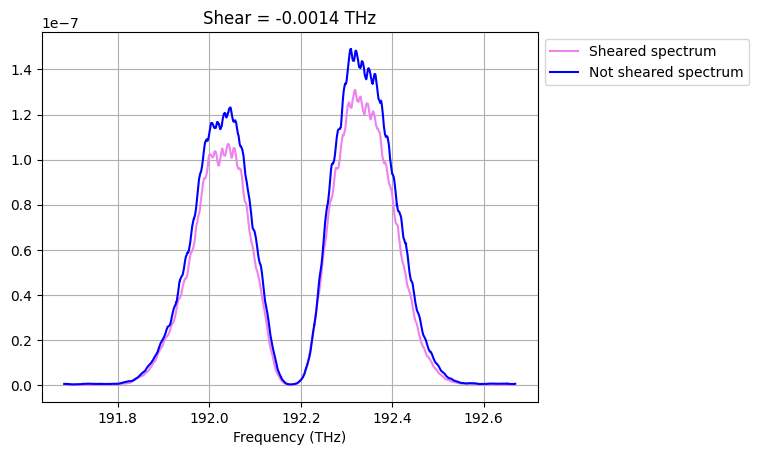

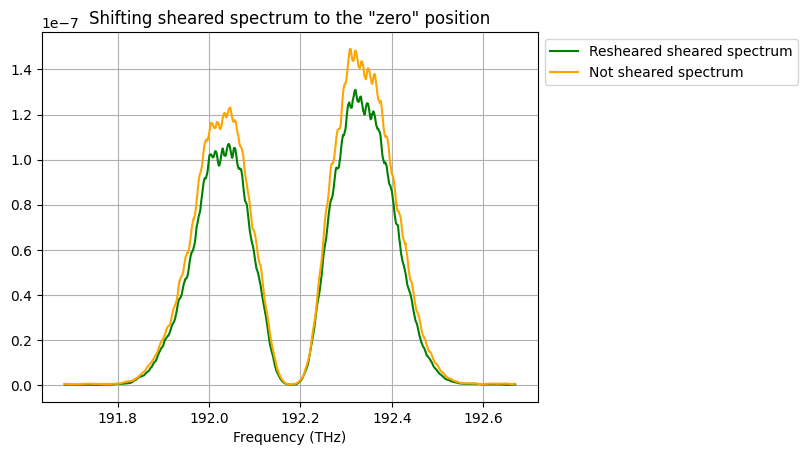

In [4]:
module = sys.modules["spectral_analysis"]
importlib.reload(module)

spectra = []
spectr_num_to_plot = 1

for num, path in enumerate(["data/not_sheared_apex.txt", "data/sheared_apex.txt", "data/t_spectrum_apex.txt", "data/p_spectrum_apex.txt"]):
    loaded_spectrum = sa.load_tsv(path, source = "APEX")
    loaded_spectrum.cut(start = 1556, end = 1564)
    if num == spectr_num_to_plot: 
        sa.plot(loaded_spectrum, title = "Interference spectrum before removing the comb", color = "deeppink")
    loaded_spectrum_2 = loaded_spectrum.copy()
    loaded_spectrum = loaded_spectrum.remove_comb(inplace = False)
    if num == spectr_num_to_plot: 
        plt.scatter(loaded_spectrum.X, loaded_spectrum.Y, color = "green")
        plt.plot(loaded_spectrum_2.X, loaded_spectrum_2.Y, color = "deeppink")
        plt.grid()
        plt.title("Interference spectrum while removing the comb")
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Intensity")
        plt.show()
        sa.plot(loaded_spectrum, title = "Interference spectrum after removing the comb", color = "orange")
    loaded_spectrum.moving_average(0.01)
    if num == spectr_num_to_plot: 
        sa.plot(loaded_spectrum, title = "Interference spectrum after smoothing", color = "green")
    loaded_spectrum.Y -= 8e-9#np.min(loaded_spectrum.moving_average(0.1, inplace = False).Y)
    loaded_spectrum.Y[loaded_spectrum.Y < 0] = 0
    if num == spectr_num_to_plot: 
        sa.plot(loaded_spectrum, title = "Interference spectrum after reducing the offset", color = "red")
    loaded_spectrum.wl_to_freq()

    if num == 0:
        loaded_spectrum.constant_spacing()
        X_axis = loaded_spectrum.X.copy()
    else:
        loaded_spectrum = sa.interpolate(loaded_spectrum, X_axis.copy())
    spectra.append(loaded_spectrum.copy())

sheared = spectra[1].copy()
not_sheared = spectra[0].copy()

shear = sa.find_shear(not_sheared, sheared, how = "com", show_plot = True, smoothing_period = 0.02)

In [5]:
for i in spectra:
    print(isinstance(i, sa.spectrum))

True
True
True
True


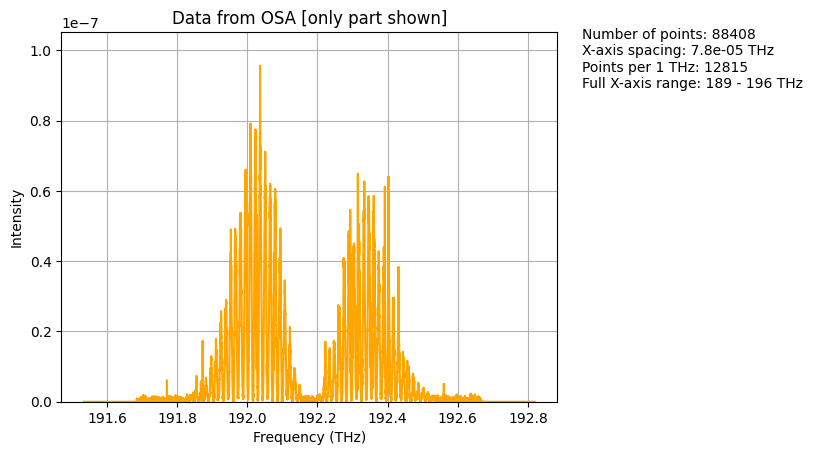

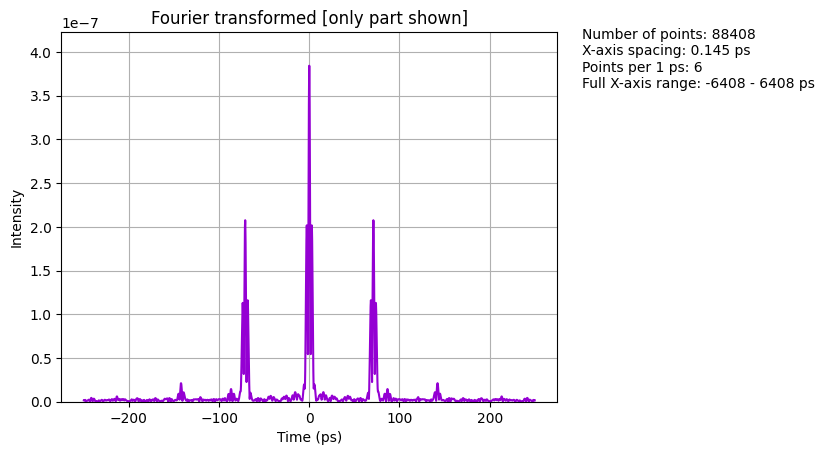

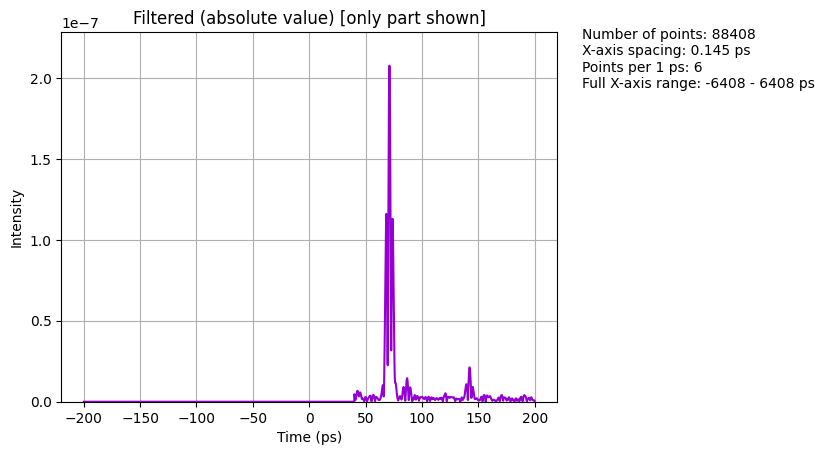

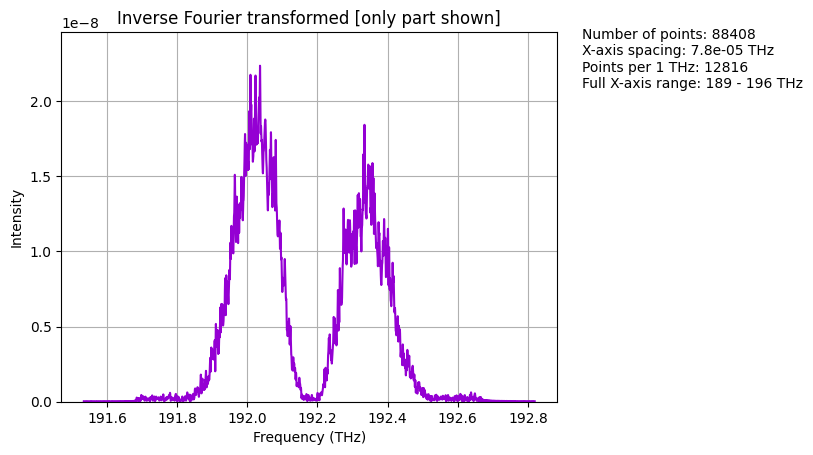

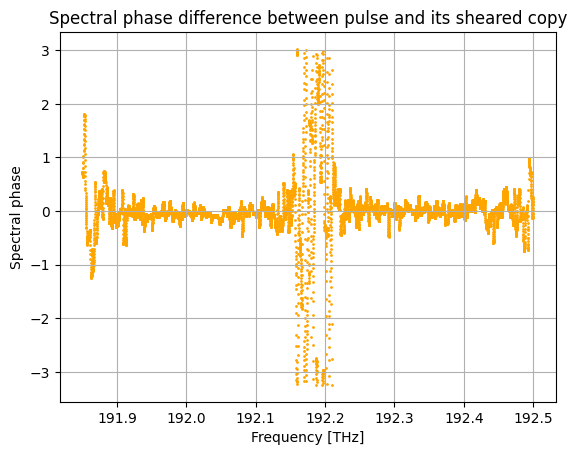

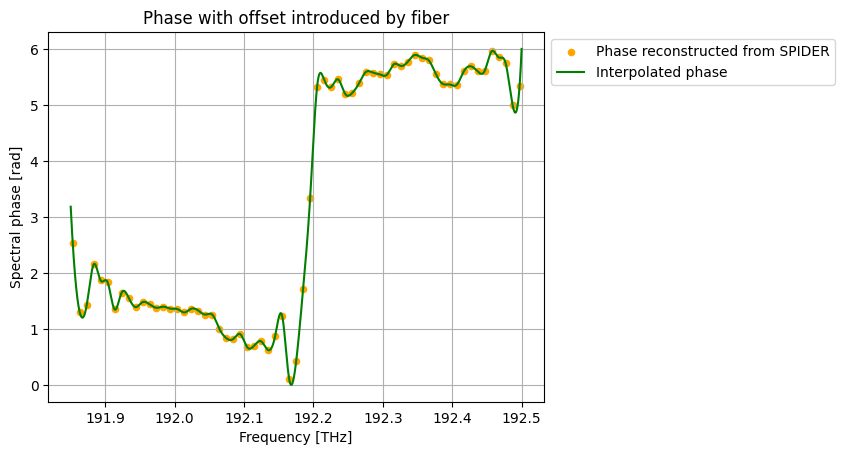

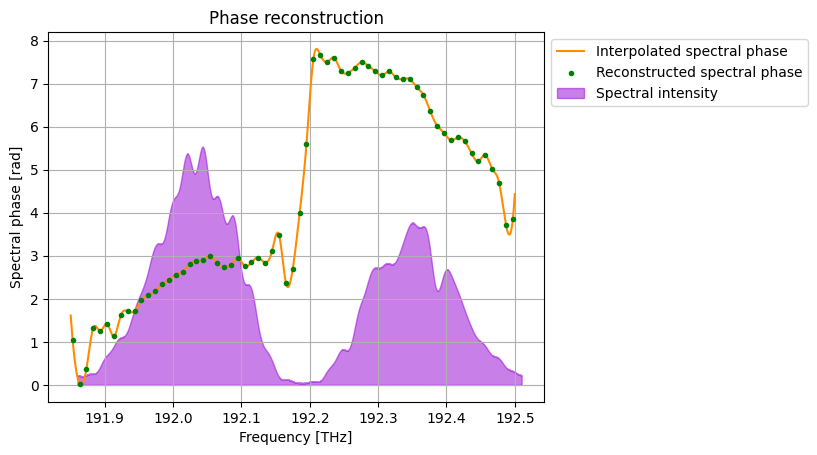

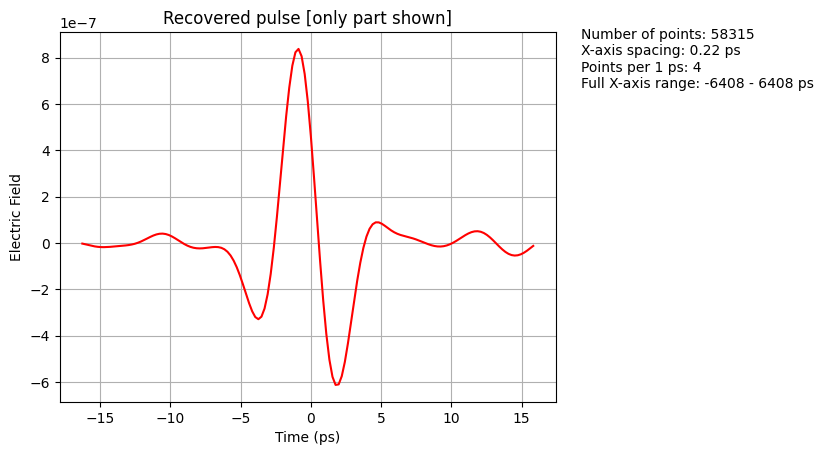

In [6]:
sa.spider(temporal_spectrum = spectra[2],
        phase_spectrum = spectra[3],
        intensity_spectrum = spectra[0].moving_average(0.05),
        shear = 0.01,
        plot_phase_inter = True,
        plot_steps = True,
        plot_phase = True,
        plot_pulse = True,
        fiber_length = 84,
        phase_borders = [191.85, 192.5],
        improve_resolution = 1,
        temp_phase_param = 0,
        cut_here = [40, 500])